In [75]:
from image_analyzer import Image_analyzer
import numpy as np
import matplotlib.pyplot as plt
import os

## Fig 10.16

In [76]:
file_dir = os.getcwd()
images_dir = file_dir + "/images/"

fig_10_16_a_path = images_dir+"Fig1016(a)(building_original).pgm"
print(fig_10_16_a_path)

fig_10_16_a_analyzer = Image_analyzer(fig_10_16_a_path)

fig_10_16_a_analyzer.mypgmread()

/Users/fuad/Documents/coding/image_processing_tutorials/006_segmentation/images/Fig1016(a)(building_original).pgm
Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/006_segmentation/images/Fig1016(a)(building_original).pgm


(array([[230, 231, 230, ..., 230, 228, 227],
        [228, 228, 228, ..., 231, 231, 231],
        [227, 227, 225, ..., 230, 230, 228],
        ...,
        [ 56,  62,  55, ..., 133, 115, 111],
        [ 54,  50,  47, ..., 152, 129, 126],
        [ 38,  27,  34, ..., 161, 142, 140]], dtype=uint8),
 1114,
 834,
 255)

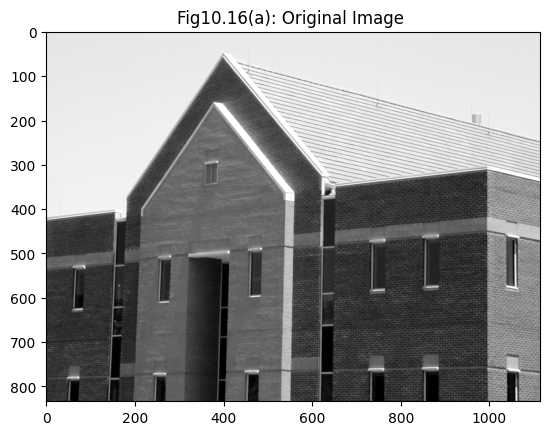

In [77]:
plt.figure()
plt.title("Fig10.16(a): Original Image ")
#  The intensities of the image in Fig. 10.16(a) were scaled to the range [0, 1]. 
fig_10_16_a_analyzer.image_array = fig_10_16_a_analyzer.image_array/255
plt.imshow(fig_10_16_a_analyzer.image_array, cmap='gray')
plt.show()


In [78]:
sobel_x_kernel = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])
fig_10_16_b = np.abs(fig_10_16_a_analyzer.myImageCorrelation(sobel_x_kernel))

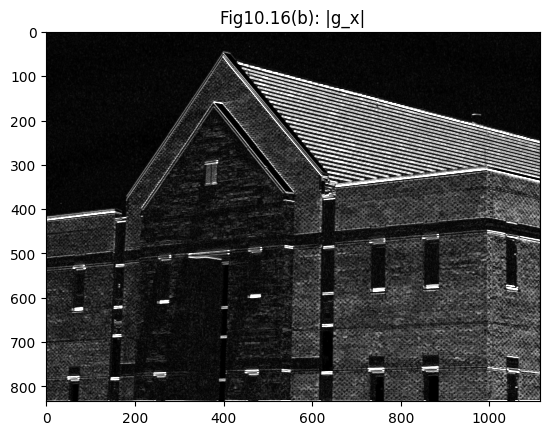

In [79]:
plt.figure()
plt.title("Fig10.16(b): |g_x|")
plt.imshow(fig_10_16_b, cmap='gray', vmin=0, vmax=1)
plt.show()

The Fig10.16(b) is obtained by take the gradient of Fig10.16(a) along the x-dimension,  using the Sobel_x filter. It effectively detects horizontal edges, with bright lines indicating areas of sharp intensity changes, such as rooflines, windows, and bricks.

In [80]:
sobel_y_kernel = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])
fig_10_16_c = np.abs(fig_10_16_a_analyzer.myImageCorrelation(sobel_y_kernel))

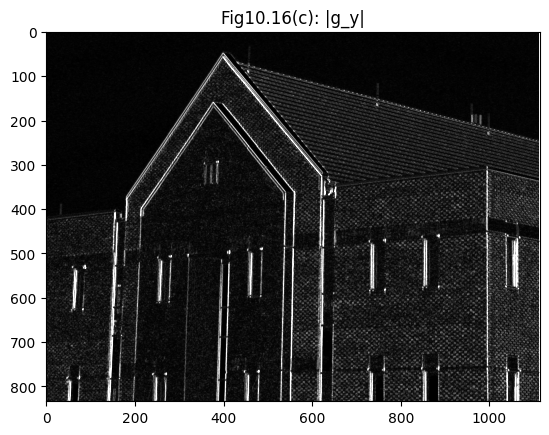

In [81]:
plt.figure()
plt.title("Fig10.16(c): |g_y|")
plt.imshow(fig_10_16_c, cmap='gray', vmin=0, vmax=1)
plt.show()

Fig10.16(c) represents the gradient of Fig10.16(a) along the y-dimension that obtained by using the Sobel_y filter. This image highlights vertical edges, with bright lines indicating significant intensity changes, emphasizing features like wall corners, window frames, and vertical structural elements.

In [82]:
fig_10_16_d = fig_10_16_b + fig_10_16_c

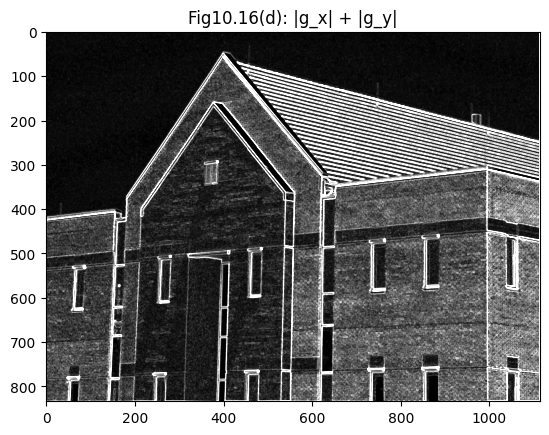

In [83]:
plt.figure()
plt.title("Fig10.16(d): |g_x| + |g_y|")
plt.imshow(fig_10_16_d, cmap='gray', vmin=0, vmax=1)
plt.show()



Fig10.16(d) represents the combined gradient magnitude $∣g_x∣+∣g_y∣$, emphasizing both horizontal and vertical edges by summing the results of the Sobel_x and Sobel_y filters. However, due to the gradient operation, not only the edges but also some noise in the image have brightened, which  reduce the clarity of the edge detection. Applying a smoothing process (like average mask or gaussian blur) before the gradient calculation can help suppress noise, resulting in more accurate and cleaner edge detection.

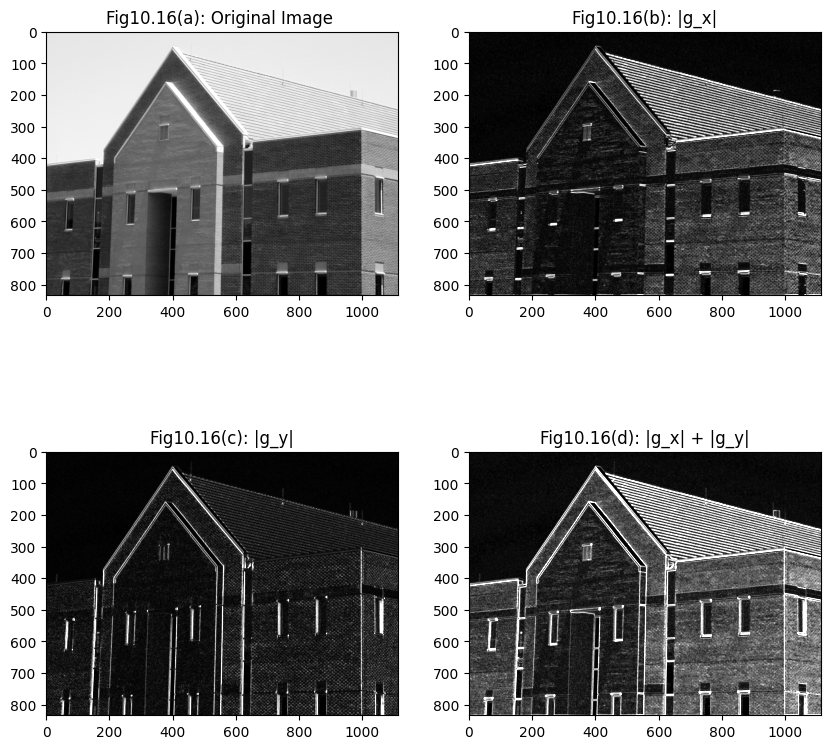

In [84]:
#plot all the images in one figure with subplots
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Fig10.16(a): Original Image ")
plt.imshow(fig_10_16_a_analyzer.image_array, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Fig10.16(b): |g_x|")
plt.imshow(fig_10_16_b, cmap='gray', vmin=0, vmax=1)

plt.subplot(2, 2, 3)
plt.title("Fig10.16(c): |g_y|")
plt.imshow(fig_10_16_c, cmap='gray', vmin=0, vmax=1)

plt.subplot(2, 2, 4)
plt.title("Fig10.16(d): |g_x| + |g_y|")
plt.imshow(fig_10_16_d, cmap='gray', vmin=0, vmax=1)

plt.show()

## Fig 10.18

In [85]:
#Same sequence as in Fig. 10.16, but with the original image smoothed using a 5 * 5 averaging filter prior to edge detection.
average_mask_5x5 = np.ones((5, 5))/25
fig_10_18_a = fig_10_16_a_analyzer.myImageCorrelation(average_mask_5x5)
fig_10_18_a_analyzer = Image_analyzer()
fig_10_18_a_analyzer.image_array = fig_10_18_a
fig_10_18_a_analyzer.set_image_height(fig_10_16_a_analyzer.get_image_height())
fig_10_18_a_analyzer.set_image_width(fig_10_16_a_analyzer.get_image_width())



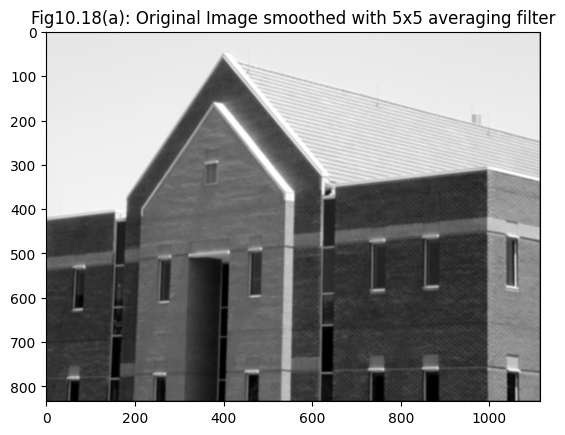

In [86]:
plt.figure()
plt.title("Fig10.18(a): Original Image smoothed with 5x5 averaging filter")
plt.imshow(fig_10_18_a, cmap='gray')
plt.show()

Fig10.18(a) is the result of applying a 5x5 average filter to the original image, effectively smoothing it. By performing this smoothing process before the gradient calculation, noise and small details are reduced, ensuring that the subsequent gradient operation focuses more accurately on prominent edges.

In [87]:
fig_10_18_b = np.abs(fig_10_18_a_analyzer.myImageCorrelation(sobel_x_kernel))

In [88]:
print(fig_10_18_b.max())

2.932078431372549


In [89]:
print(fig_10_18_b.min())

0.0


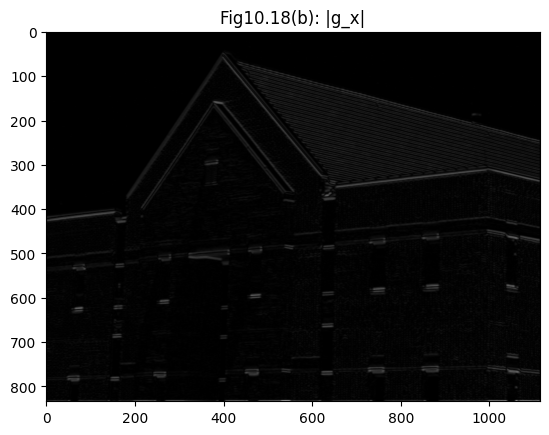

In [90]:
plt.figure()
plt.title("Fig10.18(b): |g_x|")
plt.imshow(fig_10_18_b, cmap='gray' )
plt.show()

Fig10.18(b) represents the result of applying the Sobel_x filter to the smoothed image from Fig10.18(a). Unlike Fig10.16(b), the edges caused by the bricks have largely disappeared, allowing the more significant and necessary edges to stand out. This improvement is due to the smoothing process in Fig10.18(a), which reduces the influence of noise and high-frequency details.

In [91]:
fig_10_18_c = np.abs(fig_10_18_a_analyzer.myImageCorrelation(sobel_y_kernel))

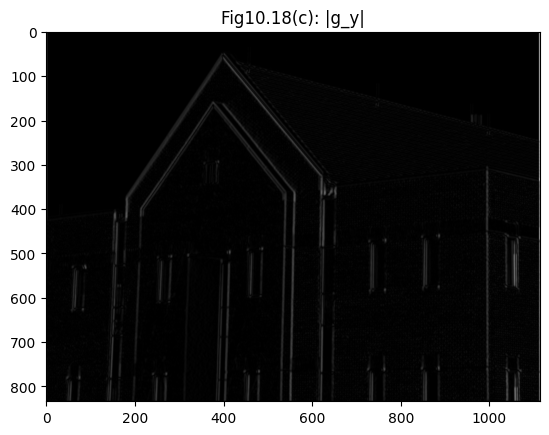

In [92]:
plt.figure()
plt.title("Fig10.18(c): |g_y|")
plt.imshow(fig_10_18_c, cmap='gray')
plt.show()


Fig10.18(c) shows the result of applying the Sobel_y filter to the smoothed image from Fig10.18(a). This operation highlights vertical edges in the image. Compared to Fig10.16(c), the smoothing process in Fig10.18(a) reduces the noise and eliminates unnecessary edges, such as those caused by brick patterns, ensuring that the focus remains on the more critical structural features.

In [93]:
fig_10_18_d = fig_10_18_b + fig_10_18_c


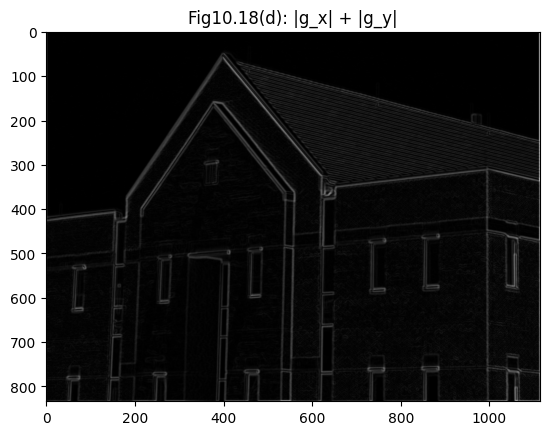

In [94]:

plt.figure()
plt.title("Fig10.18(d): |g_x| + |g_y|")
plt.imshow(fig_10_18_d, cmap='gray')
plt.show()

Fig10.18(d) represents the absolute sum of gradients $∣g_x∣+∣g_y∣$,, calculated from the smoothed image in Fig10.18(a). Compared to Fig10.16(d), the result shows much clearer and more prominent essential edges, as the smoothing process has eliminated noise and unnecessary details like brick textures. 

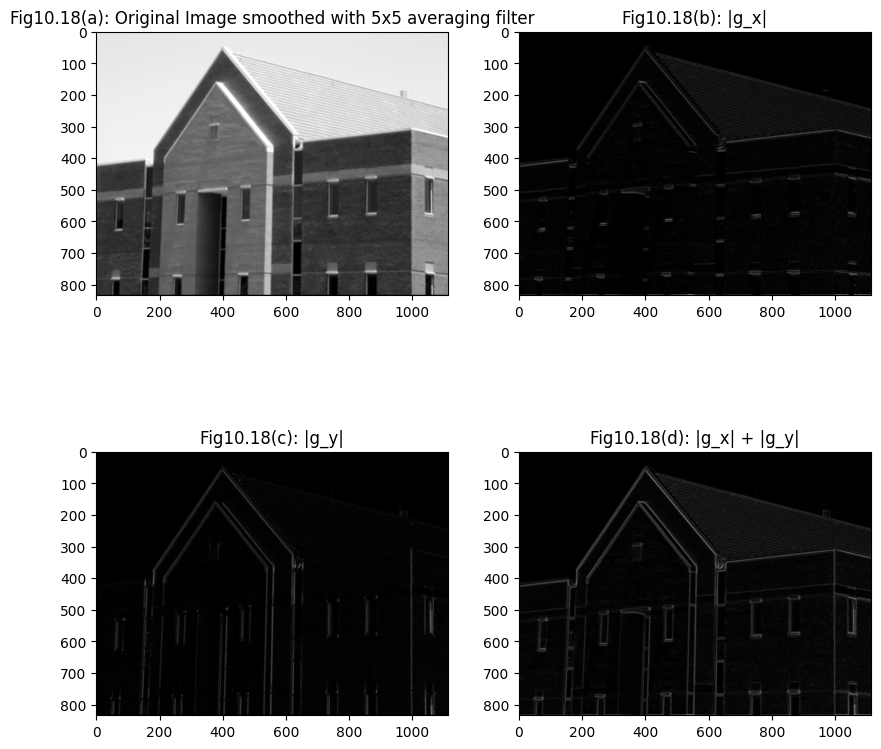

In [66]:
#plot all the images in one figure with subplots
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Fig10.18(a): Original Image smoothed with 5x5 averaging filter")
plt.imshow(fig_10_18_a, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Fig10.18(b): |g_x|")
plt.imshow(fig_10_18_b, cmap='gray')

plt.subplot(2, 2, 3)
plt.title("Fig10.18(c): |g_y|")
plt.imshow(fig_10_18_c, cmap='gray')

plt.subplot(2, 2, 4)
plt.title("Fig10.18(d): |g_x| + |g_y|")
plt.imshow(fig_10_18_d, cmap='gray')

plt.show()

# Fig 10.38 

In [96]:
#read and plot the image Fig1038(a)(noisy_fingerprint).pgm
file_dir = os.getcwd()
images_dir = file_dir + "/images/"

fig_10_38_a_path = images_dir+"Fig1038(a)(noisy_fingerprint).pgm"
print(fig_10_38_a_path)

fig_10_38_a_analyzer = Image_analyzer(fig_10_38_a_path)

fig_10_38_a_analyzer.mypgmread()

/Users/fuad/Documents/coding/image_processing_tutorials/006_segmentation/images/Fig1038(a)(noisy_fingerprint).pgm
Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/006_segmentation/images/Fig1038(a)(noisy_fingerprint).pgm


(array([[205, 205, 201, ..., 191, 188, 188],
        [200, 200, 203, ..., 194, 199, 199],
        [200, 200, 203, ..., 194, 199, 199],
        ...,
        [189, 189, 198, ..., 210, 207, 207],
        [189, 189, 198, ..., 210, 207, 207],
        [202, 202, 204, ..., 201, 203, 203]], dtype=uint8),
 798,
 958,
 255)

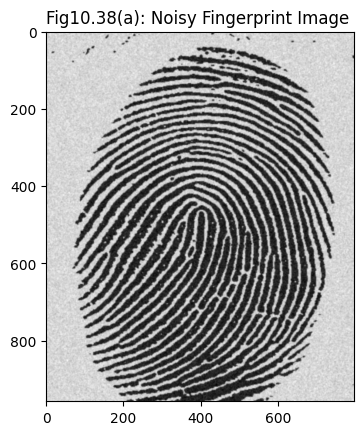

In [97]:
plt.figure()
plt.title("Fig10.38(a): Noisy Fingerprint Image ")
plt.imshow(fig_10_38_a_analyzer.image_array, cmap='gray')
plt.show()


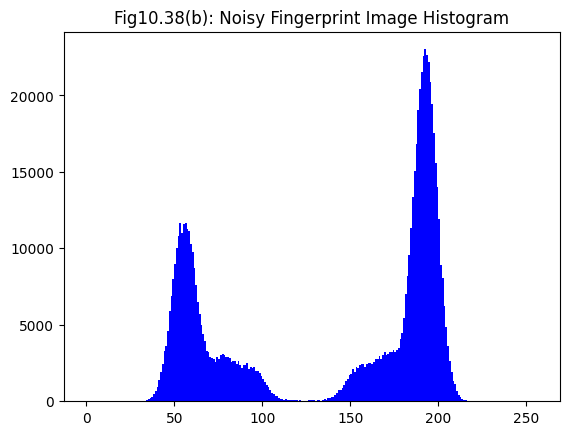

In [98]:
plt.figure()
plt.title("Fig10.38(b): Noisy Fingerprint Image Histogram")
hist = plt.hist(fig_10_38_a_analyzer.image_array.flatten(), 256, [0, 256], color = 'b')
plt.show()

The Fig10.38(b) shows the histogram of the fingerprint in Fig10.38(a) .It can be observed there is two dominant peaks, the background and the footprint itself. Where one corresponds to the lighter background and the other to the darker fingerprint details.

In [99]:
T ,tresholded_image = fig_10_38_a_analyzer.myImageBasicGlobalTresholding(dt = 0.1)

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


In [100]:
print(T)

125.38601930911415


The treshold finded using Basic global tresholding algorithm is 125 and it is at the middle of two peaks in the histogram.

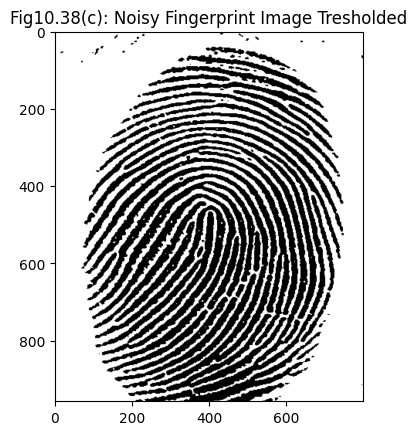

In [11]:
plt.figure()
plt.title("Fig10.38(c): Noisy Fingerprint Image Tresholded")
plt.imshow(tresholded_image, cmap='gray')
plt.show()

Fig10.38(c) shows the result of thresholding the image using the threshold value determined by the basic global thresholding algorithm. The thresholding works effectively, as evidenced by the histogram because there is two seperated peaks.

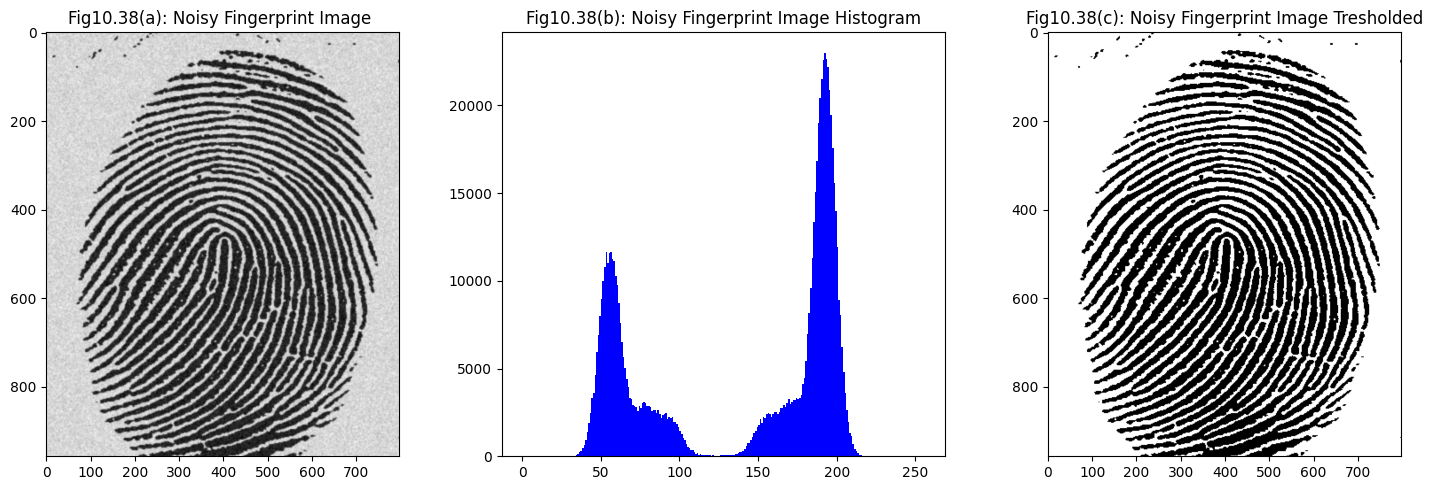

In [17]:
#plot all the images in one figure with subplots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Fig10.38(a): Noisy Fingerprint Image ")
plt.imshow(fig_10_38_a_analyzer.image_array, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Fig10.38(b): Noisy Fingerprint Image Histogram")
plt.hist(fig_10_38_a_analyzer.image_array.flatten(), 256, [0, 256], color='b')

plt.subplot(1, 3, 3)
plt.title("Fig10.38(c): Noisy Fingerprint Image Tresholded")
plt.imshow(tresholded_image, cmap='gray')

plt.tight_layout()
plt.show()

## Fig 10.50

In [1]:
from image_analyzer import Image_analyzer
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# read and plot the image Fig1050(a)(sine_shaded_text_image).pgm
file_dir = os.getcwd()
images_dir = file_dir + "/images/"

fig_10_50_a_path = images_dir+"Fig1050(a)(sine_shaded_text_image).pgm"
print(fig_10_50_a_path)

fig_10_50_a_analyzer = Image_analyzer(fig_10_50_a_path)

fig_10_50_a_analyzer.mypgmread()

/Users/fuad/Documents/coding/image_processing_tutorials/006_segmentation/images/Fig1050(a)(sine_shaded_text_image).pgm
Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/006_segmentation/images/Fig1050(a)(sine_shaded_text_image).pgm


(array([[  0,   0,   0, ..., 170, 165, 159],
        [  0,   0, 141, ..., 170, 165, 159],
        [153, 147, 141, ..., 170, 165, 159],
        ...,
        [153, 147, 141, ..., 170, 165, 159],
        [153, 147, 141, ..., 170, 165, 159],
        [153, 147, 141, ..., 170, 165, 159]], dtype=uint8),
 772,
 686,
 255)

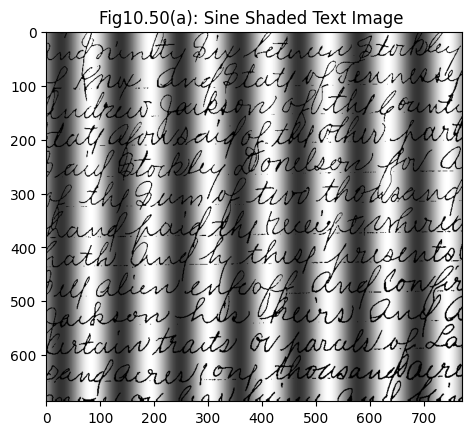

In [3]:
plt.figure()
plt.title("Fig10.50(a): Sine Shaded Text Image ")
plt.imshow(fig_10_50_a_analyzer.image_array, cmap='gray')
plt.show()

The Fig10.50 represents a sine shaded text image, there is a wave like effect across the image.

In [4]:
otsu_t ,otsu_trsholded_image = fig_10_50_a_analyzer.myImageGlobalTresholdingOtsu()
print(otsu_t)


136


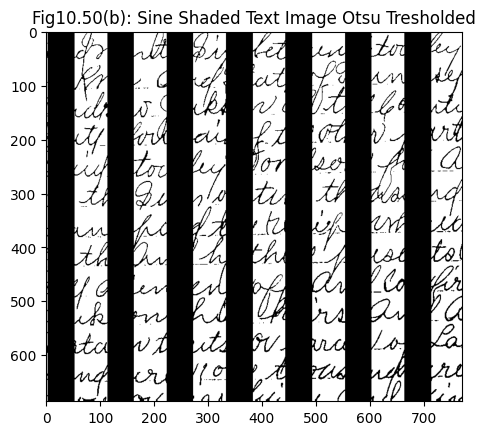

In [5]:
plt.figure()
plt.title("Fig10.50(b): Sine Shaded Text Image Otsu Tresholded")
plt.imshow(otsu_trsholded_image, cmap='gray')
plt.show()


The Fig10.50(b) represents the image Fig10.50(a) Thresolded by using Otsu tresholding but it not work well because it is sine shaded. The sine wave pattern causes vertical black strips to appear in the thresholded image. To get better result the image will be tresholded by local tresholding.

In [10]:
local_tresholded_image = fig_10_50_a_analyzer.myImageLocalTresholdingAverage(15, 0.4)

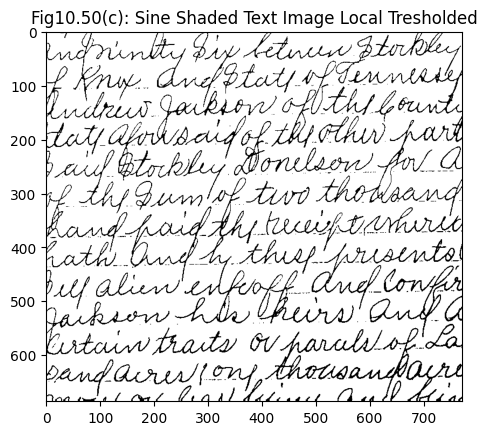

In [11]:
plt.figure()
plt.title("Fig10.50(c): Sine Shaded Text Image Local Tresholded")
plt.imshow(local_tresholded_image, cmap='gray')
plt.show()


Fig10.50(c) represents the Fig10.50(a) tressolded locally with average tresholding method with kernel size 15 and a coefficent b = 0.4 . The local thresholding effectively handles the sine shading, and the result is much improved. Unlike in Fig10.50(b), no black strips appear, as the local thresholding adapts to the varying intensity patterns in the image

## In the following section i try to filter the image in the frequency domain but I couldn't succeed

In [47]:
# thae the fourier transform of the image and plot the magnitude
fig_10_50_a_log_analyzer = Image_analyzer()
fig_10_50_a_log_analyzer.image_array = fig_10_50_a_analyzer.myImageLogTransform()
fig_10_50_a_log_analyzer.set_image_height(fig_10_50_a_analyzer.get_image_height())
fig_10_50_a_log_analyzer.set_image_width(fig_10_50_a_analyzer.get_image_width())
fig_10_50_a_log_fourier = fig_10_50_a_log_analyzer.my2Dfftshifted()


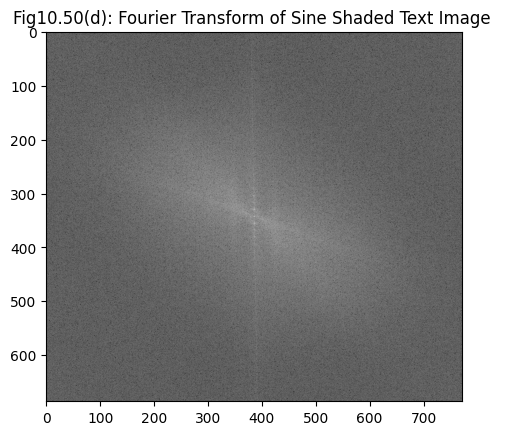

In [50]:
#plot the fourier transform of the image
plt.figure()
plt.title("Fig10.50(d): Fourier Transform of Sine Shaded Text Image ")
plt.imshow(np.log( 1 + np.abs(fig_10_50_a_log_fourier)), cmap='gray')
plt.show()

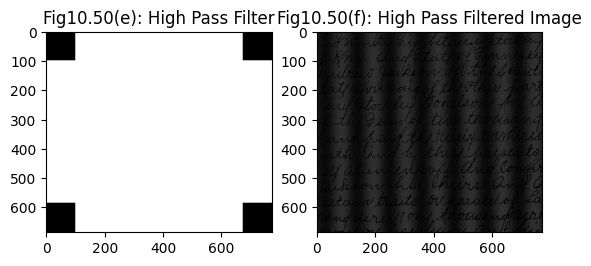

In [63]:
# design a high pass filter and apply it to the image for ignore the black background
fig_10_50_a_high_pass_filter = np.ones((fig_10_50_a_analyzer.get_image_height(), fig_10_50_a_analyzer.get_image_width()))
filter_range = 100
fig_10_50_a_high_pass_filter[0:filter_range, 0:filter_range] = 0
fig_10_50_a_high_pass_filter[0:filter_range, -filter_range:] = 0
fig_10_50_a_high_pass_filter[-filter_range:, 0:filter_range] = 0
fig_10_50_a_high_pass_filter[-filter_range:, -filter_range:] = 0

fig_10_50_a_high_pass_filtered_fourier = fig_10_50_a_high_pass_filter * fig_10_50_a_log_fourier

fig_10_50_a_high_pass_filtered_image = fig_10_50_a_log_analyzer.my2Difft(fig_10_50_a_high_pass_filtered_fourier)

fig_10_50_a_high_pass_filtered_image = np.exp(fig_10_50_a_high_pass_filtered_image)

plt.figure()
plt.subplot(1, 2, 1)
plt.title("Fig10.50(e): High Pass Filter")
plt.imshow(np.real(fig_10_50_a_high_pass_filter), cmap='gray')


plt.subplot(1, 2, 2)
plt.title("Fig10.50(f): High Pass Filtered Image")
plt.imshow(np.real(fig_10_50_a_high_pass_filtered_image), cmap='gray')
plt.show()


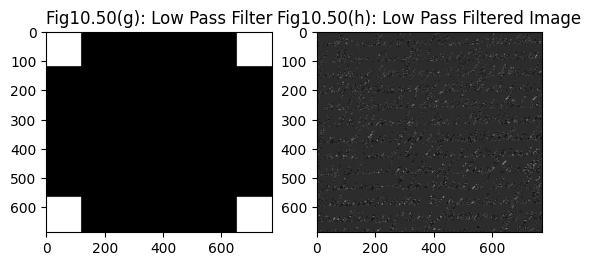

In [73]:
# design a low pass filter and apply it to the image for ignore the black background
fig_10_50_a_low_pass_filter = np.zeros((fig_10_50_a_analyzer.get_image_height(), fig_10_50_a_analyzer.get_image_width()))
filter_range = 120
fig_10_50_a_low_pass_filter[0:filter_range, 0:filter_range] = 1
fig_10_50_a_low_pass_filter[0:filter_range, -filter_range:] = 1
fig_10_50_a_low_pass_filter[-filter_range:, 0:filter_range] = 1
fig_10_50_a_low_pass_filter[-filter_range:, -filter_range:] = 1

fig_10_50_a_low_pass_filtered_fourier = fig_10_50_a_low_pass_filter * fig_10_50_a_log_fourier

fig_10_50_a_low_pass_filtered_image = fig_10_50_a_log_analyzer.my2Difft(fig_10_50_a_low_pass_filtered_fourier)

fig_10_50_a_low_pass_filtered_image = np.exp(fig_10_50_a_low_pass_filtered_image)

plt.figure()
plt.subplot(1, 2, 1)
plt.title("Fig10.50(g): Low Pass Filter")
plt.imshow(np.real(fig_10_50_a_low_pass_filter), cmap='gray')


plt.subplot(1, 2, 2)
plt.title("Fig10.50(h): Low Pass Filtered Image")
plt.imshow(np.real(fig_10_50_a_low_pass_filtered_image), cmap='gray')
plt.show()